# Image Cartoonization
This notebook provides a step-by-step process for cartoonizing an image.
1. Image Preprocessing
2. Cartoonization Process
3. Cartoon Image Enhancement 


# Importing Libraries
The following libraries are used for image processing:
- `cv2`: For image manipulation.
- `numpy`: For numerical operations.
- `matplotlib.pyplot`: For displaying images.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image and Image Preprocessing

Specify the path to the image file you want to cartoonize.


In [2]:
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at the provided path: {image_path}")
    return img


# Image Resizing and Displaying
1. **resize_image**: Resizes the image to a target width while maintaining aspect ratio. Resize image for better performance
2. **display_image**: Displays an image using Matplotlib.


In [ ]:
def resize_image(img, target_width=600):
    height, width = img.shape[:2]
    aspect_ratio = width / height
    target_height = int(target_width / aspect_ratio)
    return cv2.resize(img, (target_width, target_height))

def display_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib display
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


# Grayscale Conversion and Image Sharpening
1. **convert_to_grayscale**: Converts the image to grayscale and applies a median blur.
2. **sharpen_image**: Sharpens the image using a kernel.


In [4]:
def convert_to_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.medianBlur(gray, 5)

def sharpen_image(img):
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])
    return cv2.filter2D(img, -1, sharpen_kernel)


# Edge Detection and Bilateral Filtering
1. **detect_edges_canny**: Detects edges using the Canny edge detector and inverts the result.
2. **apply_bilateral_filter**: Applies bilateral filtering for color smoothing.


In [ ]:
def detect_edges_canny(img_gray):
    edges = cv2.Canny(img_gray, threshold1=50, threshold2=150)
    return cv2.bitwise_not(edges)

def apply_bilateral_filter(img, no_of_filters=2):
    color = img.copy()
    for _ in range(no_of_filters):
        color = cv2.bilateralFilter(color, 9, 150, 150)  
    return color


# Image Enhancement Techniques

# Blending and Gamma Correction
1. **blend_with_original**: Blends the original image with the cartoonized version.
2. **blend_edges_with_image**: Adds edges as an overlay on the image.
3. **gamma_correction**: Enhances image details using gamma correction.


In [6]:
def blend_with_original(img, cartoon, alpha):
    return cv2.addWeighted(img, alpha, cartoon, 1 - alpha, 0)

def blend_edges_with_image(img, edges):
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(img, 0.9, edges_colored, 0.1, 0)

def gamma_correction(img, gamma=1.2):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)


# Cartoonizing the Image
**cartoonize_image**: Applies the edge mask to the filtered image to create a cartoon effect.


In [7]:
def cartoonize_image(img, edges):
    return cv2.bitwise_and(img, img, mask=edges)


## Processing the Image
The process_image function combines all the steps:
1. Loading the image.
2. Resizing and displaying it.
3. Applying grayscale, sharpening, edge detection, filtering, blending, and gamma correction.
4. Displaying the final cartoonized image.


In [16]:
def process_image(image_path):
    img = load_image(image_path)
    img_resized = resize_image(img)
    print("Original Image")
    display_image(img_resized)

    # Cartoonization Steps
    gray_img = convert_to_grayscale(img_resized)
    sharpened_img = sharpen_image(img_resized)

    edges = detect_edges_canny(gray_img)
    filtered_img = apply_bilateral_filter(sharpened_img)

    # Cartoonize and blend with the original image
    cartoon_img = cartoonize_image(filtered_img, edges)
    cartoon_with_original_colors = blend_with_original(img_resized, cartoon_img, alpha=0.25)
    blended_with_edges = blend_edges_with_image(cartoon_with_original_colors, edges)

    # Enhance details with gamma correction
    enhanced_cartoon = gamma_correction(blended_with_edges, gamma=0.85)

    # Display final cartoonized image
    print("Cartoon Image")
    display_image(enhanced_cartoon)

    return enhanced_cartoon


# Run the Image Processing Pipeline
Replace `path_to_image` with the actual file path of your image to process it.

Original Image


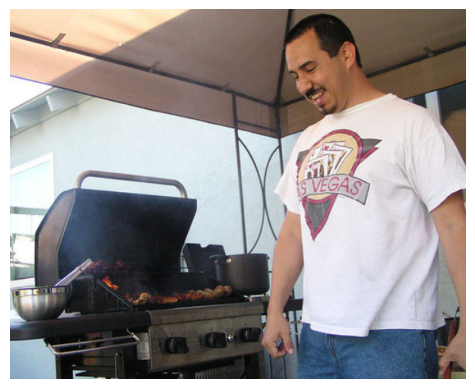

Cartoon Image


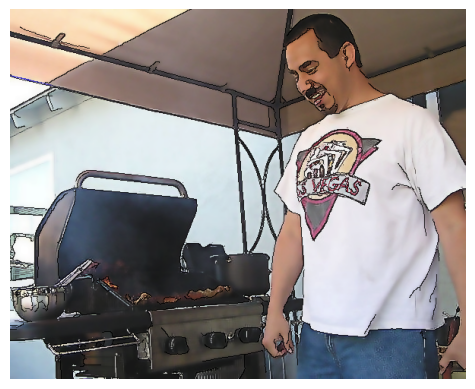

In [17]:
image_path = r"C:\Users\Yenneti Nitin Sree\OneDrive\Pictures\Cartoonization\c2.jpg"
cartoon_img_rgb = process_image(image_path)


# Cartoonization for Style Transfer Project

In this project, the **content image** used for style transfer undergoes a preprocessing step to achieve a cartoonized effect. This is done by applying **edge detection techniques**.

### Edge Detection Techniques Used

1. **Adaptive Thresholding**  
   Initially, **adaptive thresholding** was used for edge detection. This method determines the threshold for a small region of the image, which helps in preserving edges in areas with varying illumination. The steps included:  
   - Converting the image to grayscale.
   - Applying Gaussian blur to reduce noise.
   - Using adaptive thresholding to highlight edges.

2. **Canny Edge Detection**  
   Currently, the **Canny edge detection** technique is being utilized for cartoonization. This method is effective in detecting edges with a clean and sharp appearance. The steps include:  
   - Converting the image to grayscale.
   - Applying Gaussian blur to smoothen the image.
   - Using the Canny algorithm to detect edges.

### Why I have switched to Canny Edge Detection?
- **Sharpness**: Canny edge detection provides cleaner and more defined edges compared to adaptive thresholding.  
- **Consistency**: It works better for creating cartoonized images that maintain a consistent edge style.  
- **Compatibility**: The resulting edges blend well as a content image for the **style transfer project**.

### Workflow
1. **Cartoonization**:
   - Apply bilateral filtering to smoothen the image while preserving edges.
   - Use Canny edge detection for extracting edges.
2. **Style Transfer**:
   - Use the cartoonized image as the content image.
   - Apply a pre-trained style transfer model to stylize the cartoonized image.

This combination ensures that the stylized output has a unique and visually appealing cartoon-like effect.
